In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\DS-Capstone-Project-YCBS299\Week 6\unhcr_popstats_export_time_series_all_data.csv",
                encoding='latin')

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [86]:
df.head()

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,"China, Hong Kong SAR",Various/Unknown,Refugees (incl. refugee-like situations),30000


In [87]:
#df.to_csv('dataset_cleaned.csv')

### Summarize the trends for the different populations monitored by the UNHCR.

See Tableau sheet "QA"

### Could you predict the approximate number of refugees in 2020, 2025 and 2030?

In [88]:
df['Value'] = df['Value'].apply(lambda x: x if x!='*' else 0)
df['Value'] = df['Value'].astype('int64')

In [89]:
df.head()

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,"China, Hong Kong SAR",Various/Unknown,Refugees (incl. refugee-like situations),30000


In [90]:
set(df['Population type'])

{'Asylum-seekers',
 'Internally displaced persons',
 'Others of concern',
 'Refugees (incl. refugee-like situations)',
 'Returned IDPs',
 'Returned refugees',
 'Stateless persons'}

In [91]:
refugees = df.loc[df['Population type']=='Refugees (incl. refugee-like situations)']

In [92]:
ref_yearly = refugees.groupby(['Year']).agg({'Value': 'sum'})

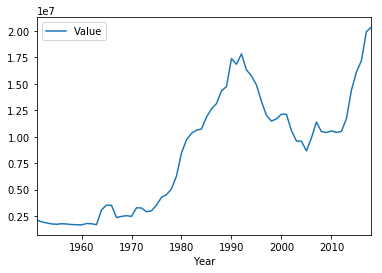

In [93]:
ref_yearly.plot()

In [94]:
from statsmodels.tsa.holtwinters import Holt

# Use simple holt for forecasting global refugees

In [95]:
forward = 80
fit1 = Holt(ref_yearly).fit()
y_hat = pd.DataFrame(fit1.forecast(forward))
y_hat['index'] = np.arange(ref_yearly.index.max()+1, ref_yearly.index.max()+forward+1)
y_hat = y_hat.set_index('index')

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [96]:
print("2020 Refugees: {}".format(int(y_hat.loc[2020, 0])))
print("2025 Refugees: {}".format(int(y_hat.loc[2025, 0])))
print("2030 Refugees: {}".format(int(y_hat.loc[2030, 0])))

2020 Refugees: 22977946
2025 Refugees: 29531798
2030 Refugees: 36085650


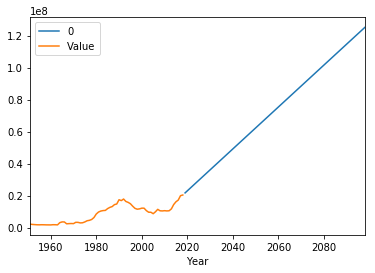

In [97]:
ax = y_hat.plot()
ref_yearly.plot(ax=ax)

### Top 10 Countries with most internally displaced people

In [98]:
int_disp_2018 = df.loc[(df['Population type']=='Internally displaced persons') & (df['Year']==2018)]

In [101]:
int_disp_2018.sort_values(by=['Value'], ascending=False).head(10)

,Year,Country / territory of asylum/residence,Origin,Population type,Value
183363,2018,Colombia,Colombia,Internally displaced persons,7816472
190969,2018,Syrian Arab Rep.,Syrian Arab Rep.,Internally displaced persons,6183920
183262,2018,Dem. Rep. of the Congo,Dem. Rep. of the Congo,Internally displaced persons,4516865
190412,2018,Somalia,Somalia,Internally displaced persons,2648000
184845,2018,Ethiopia,Ethiopia,Internally displaced persons,2615800
188863,2018,Nigeria,Nigeria,Internally displaced persons,2167924
192090,2018,Yemen,Yemen,Internally displaced persons,2144718
180698,2018,Afghanistan,Afghanistan,Internally displaced persons,2106893
190490,2018,South Sudan,South Sudan,Internally displaced persons,1878153
190295,2018,Sudan,Sudan,Internally displaced persons,1864195


### Provide the top 10 countries which are the highest “generators” of refugees in a particular year

See Tableau sheet "QD"

# Let's focus on The Syrian refugee crisis which has been in the news for a while now

### Which year had the most Internally Displaced Persons (from 2011 to today)?

In [108]:
from_2011 = df.loc[(df['Year'] > 2010) & (df['Population type'] == 'Internally displaced persons')]

In [110]:
from_2011.groupby(['Year']).sum().sort_values(['Value'], ascending=False)

,Value
Year,
2018,41408938
2017,39118516
2015,37494172
2016,36627127
2014,32274619
2013,23925555
2012,17670368
2011,15473378


Looks like 2018 has the most internally displaced persons

### How does the number of IDPs compare to the population of Syria?
See Tableau sheet "Bb"

### What was the total refugees from 2011 to today?
See Tableau sheet "Bc"

### How does the number of refugees compare to the population of Syria?
See Tableau sheet "Bd"

### Which countries have hosted the most refugees from Syria (top 10)? How many?
See Tableau sheet "Be"

In [127]:
s_ref = df.loc[(df['Country / territory of asylum/residence'] != 'Syrian Arab Rep.') & 
              (df['Origin'] == 'Syrian Arab Rep.') &
              (df['Population type'] == 'Refugees (incl. refugee-like situations)')]

In [128]:
s_ref.groupby(['Country / territory of asylum/residence']).sum()[['Value']].sort_values(['Value'], ascending=False).head(10)

,Value
Country / territory of asylum/residence,
Turkey,14766264
Lebanon,6137704
Jordan,4054369
Germany,1708609
Iraq,1492782
Egypt,776151
Sweden,464341
Austria,153202
Netherlands,149071


### Could you predict the number of Syrian refugees in 2025?

In [130]:
refugees = df.loc[(df['Population type']=='Refugees (incl. refugee-like situations)') &
                  (df['Origin'] == 'Syrian Arab Rep.')]
ref_yearly = refugees.groupby(['Year']).agg({'Value': 'sum'})

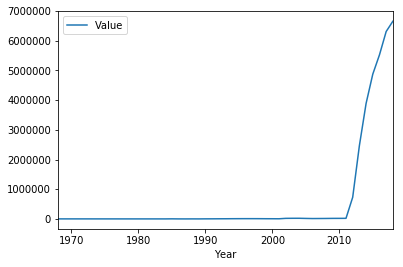

In [131]:
ref_yearly.plot()

In [132]:
forward = 10
fit1 = Holt(ref_yearly).fit()
y_hat = pd.DataFrame(fit1.forecast(forward))
y_hat['index'] = np.arange(ref_yearly.index.max()+1, ref_yearly.index.max()+forward+1)
y_hat = y_hat.set_index('index')

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [135]:
print("2025 Syrian Refugees: {}".format(int(y_hat.loc[2025, 0])))

2025 Syrian Refugees: 9074351


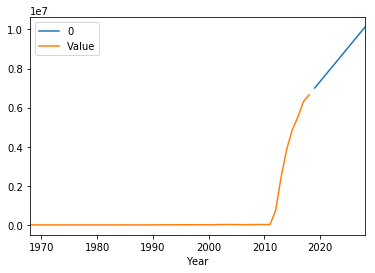

In [136]:
ax = y_hat.plot()
ref_yearly.plot(ax=ax)

# Summarize your insight into the Syrian refugee crisis from the data you have into a visualization / story. What else of interest did you find in the data?

Something I had not considered up until this point was how there were virtually no Syrian refugees before 2012. Not only does the recency of this issue shock me but the percentage of those refugees compared to the poplulation of Syria is staggering (roughly 36%). This is truely a heartbreaking catastrophe.

Another revelation I found was that the number of refugees worldwide seems to be increasing. I find this fact bizzare because to my knowledge the number of violent conflicts worldwide had been decreasing over this past half century. Perhaps we've entered a world where a small number of violent conflicts is displacing a disproportionate number of people. Needless to say this increasing number of refugees is a terrible trend & I hope this is just a short-term anomaly instead of a growing issue. 

# What challenges did you face to get to your results?

Having a stronger background in Python than Tableau I had a hard time jumping back and forth from the Tableau workbook to my jupyter notebook. I find the simple "groupby" questions quite intuitive & simple to complete in the python environment - but when a visualization is required to communicate the idea - jumping back into the Tableau rhythm was a bit of an issue. I still don't find Tableau to be that intuitive to use (I am more used to Power BI). 

The forecasting questions were a funny one for me - I used a simple holt forecast to get my results but I do believe a more sophisticated analysis is required to forecast the number of refugees worldwide. A simple linear forecast will not do as it does not take into consideration factors that influence refugee generation. I used this method due to the obivous time constraints however I would not consider this a thorough analysis by any stretch.

# Optional and time permitting only (bonus):
    • Provide a comparison between the number of refugees received by the top 3 countries and their total population
    
For this I added population data from https://data.worldbank.org/indicator/SP.POP.TOTL
    
See Tableau worksheet "Bonus1"... I imported another data source but couldn't figure out how to turn the population into the denominator on the pie chart

    • Given the data and the external references provided (or found by you), what other insights could you generate with the data?
    
Given a more thorough investigation with the population data I could repeat this workflow with % of population instead of total sum of people. Reporting on refugees living abroad has more context if you know the population of the host country